In [1]:
!pip install pydlm
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pydlm import dlm, trend, dynamic
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 2.9 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('MBB.csv')
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,6/1/2018,11783.9,11642.9,11965.2,11562.3,15.87M,0.52%
1,6/4/2018,12267.4,11723.5,12267.4,11683.2,16.32M,4.10%
2,6/5/2018,12267.4,12247.2,12408.4,12005.5,13.13M,0.00%
3,6/6/2018,12307.6,12126.4,12388.2,12045.8,17.76M,0.33%
4,6/7/2018,12448.7,12408.4,12650.1,12327.8,22.65M,1.15%
...,...,...,...,...,...,...,...
1237,5/15/2023,18850.0,18750.0,19100.0,18700.0,17.77M,1.07%
1238,5/16/2023,18800.0,18850.0,18950.0,18700.0,6.75M,-0.27%
1239,5/17/2023,18450.0,18750.0,18800.0,18450.0,9.09M,-1.86%
1240,5/18/2023,18600.0,18550.0,18650.0,18450.0,6.66M,0.81%


In [3]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('MBB.csv')
df = df[['Price','Date','High']]
print(df)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

        Price       Date     High
0     11783.9   6/1/2018  11965.2
1     12267.4   6/4/2018  12267.4
2     12267.4   6/5/2018  12408.4
3     12307.6   6/6/2018  12388.2
4     12448.7   6/7/2018  12650.1
...       ...        ...      ...
1237  18850.0  5/15/2023  19100.0
1238  18800.0  5/16/2023  18950.0
1239  18450.0  5/17/2023  18800.0
1240  18600.0  5/18/2023  18650.0
1241  18650.0  5/19/2023  18700.0

[1242 rows x 3 columns]


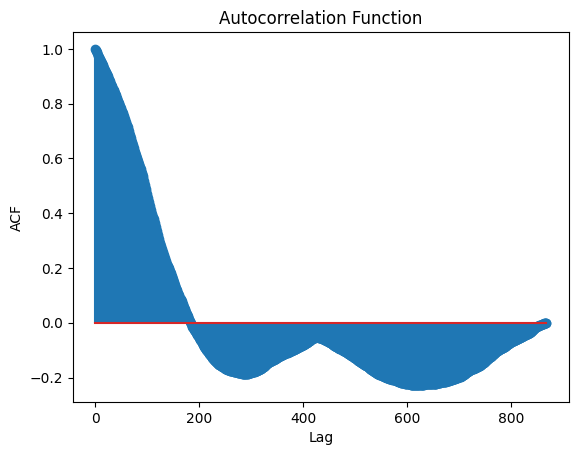

In [4]:
# Tính toán ACF
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data['Price'], nlags= 1000
                           )

# Vẽ đồ thị ACF
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.show()

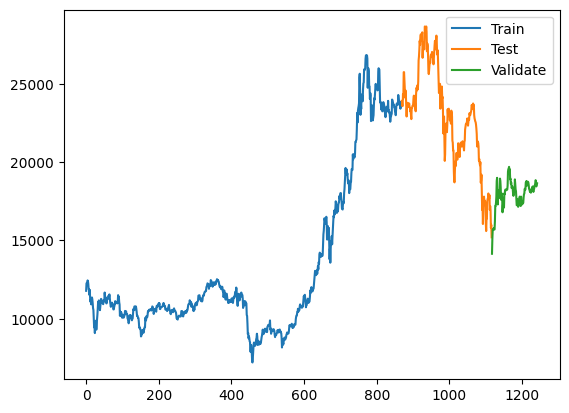

In [5]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index,val_data['Price'])
plt.legend(['Train', 'Test','Validate',])
plt.show()

In [6]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

feature = []
for price in train_data['High']:
  feature.append([price])
print(feature)
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
model = dlm(y_train)
model = model + trend(1, name='lineTrend', w=1.0)
model = model + autoReg(degree=3, data=y_train, name='ar1', w=1e7) + longSeason(period=8, stay=1, data=y_train, name='monthly', w=3.0) + dynamic(features=feature, discount=1, name='High')


[[11965.2], [12267.4], [12408.4], [12388.2], [12650.1], [12488.9], [12549.4], [12126.4], [11965.2], [11924.9], [11884.6], [11945.1], [11139.3], [11381.0], [11240.0], [11240.0], [11522.1], [11320.6], [11320.6], [10998.3], [10837.2], [10535.0], [10132.2], [9689.0], [9709.1], [9708.1], [10139.6], [10043.7], [9636.2], [9875.9], [10115.6], [10379.3], [10786.8], [11122.4], [11074.5], [11266.2], [11386.1], [11050.5], [11002.6], [10786.8], [11146.4], [11266.2], [11458.0], [11314.2], [11050.5], [11242.3], [11170.3], [11146.4], [11266.2], [11410.1], [11146.4], [11673.7], [11745.6], [11601.8], [11362.1], [11482.0], [11290.2], [11242.3], [11362.1], [11290.2], [11386.1], [11577.8], [11625.8], [11482.0], [11577.8], [11697.7], [11386.1], [11122.4], [11002.6], [10954.6], [10978.6], [11026.5], [11122.4], [11074.5], [10978.6], [10834.8], [10619.0], [10810.8], [10882.7], [11050.5], [11218.3], [11170.3], [11146.4], [11074.5], [11218.3], [11218.3], [11098.4], [11074.5], [11649.8], [11625.8], [11434.0], [11

/usr/local/lib/python3.10/dist-packages/pydlm/modeler/autoReg.py:75: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


In [7]:

model.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [8]:
# 4. Quá trình testing
x_test= []

for price in test_data['High']:
  x_test.append([price])
print(np.array(x_test).shape)
y_test = np.array(test_data['Price'])
y_pred = model.predictN(date = model.n-1, N=len(x_test),featureDict={'High': x_test})
y_pred = y_pred[0]

(248, 1)


In [9]:

y_val = np.array(val_data['Price'])
x_val= []

for price in val_data['High']:
  x_val.append([price])
print(type(x_val))

size = test_size + val_size
y_pred_val = model.predictN(featureDict={'High': x_val}, N = len(x_val))
y_pred_val = y_pred_val[0]
print(y_pred_val)

<class 'list'>
[15035.747071069429, 18932.38706103518, 17268.055002934754, 18694.97310535986, 17828.82692063088, 18734.70649269285, 17836.354234715727, 18127.965316585753, 18307.510943142217, 19245.919642241017, 19068.839483718213, 19294.81628246289, 20063.42793941458, 20169.84174413507, 20617.123044500648, 20219.844049251846, 19334.585401024255, 20289.231104308714, 19583.24877268235, 20061.647022373374, 19433.695939498528, 20197.382628055428, 20534.326534943008, 20402.347746943815, 20672.099712414114, 19735.736245615422, 19624.15449555101, 19972.338077820423, 19520.029351073266, 19591.7433271593, 19015.540303830938, 19638.39845152828, 19354.755110145037, 19482.10439647215, 19831.03903081982, 19910.394941982922, 19951.03159410998, 20468.89144660784, 19930.579057253024, 20118.463854224225, 20128.871251243196, 20089.106302123615, 20243.348823315748, 20146.328155425035, 21097.617012627034, 20844.44511155215, 21174.247737625687, 21396.06334614021, 21069.684236684407, 20976.63361523903, 213

In [10]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 2177.389061728377
Testing RMSE: 1898.03500517974
Validation MAPE: 12.00125577349294
Testing MAPE: 7.2626581229067195
Validation MAE: 2144.1382398527107
Testing MAE: 1466.0130285994892


In [11]:
# Dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['High'])


#test
x_test_ln = np.array(test_data.index).reshape(-1, 1)
y_test_ln = np.array(test_data['High'])
y_pred_ln = ln_model.predict(x_test_ln)

# Quá trình Validate
x_val_ln= np.array(val_data.index).reshape(-1, 1)
y_val_ln = np.array(val_data)
y_pred_val_ln =  ln_model.predict(x_val_ln)

# Predict the prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = ln_model.predict(feature_next_30_days)

print(feature_next_30_days)






[25206.83299614 25221.40166329 25235.97033043 25250.53899758
 25265.10766472 25279.67633187 25294.24499902 25308.81366616
 25323.38233331 25337.95100045 25352.5196676  25367.08833474
 25381.65700189 25396.22566903 25410.79433618 25425.36300333
 25439.93167047 25454.50033762 25469.06900476 25483.63767191
 25498.20633905 25512.7750062  25527.34367335 25541.91234049
 25556.48100764 25571.04967478 25585.61834193 25600.18700907
 25614.75567622 25629.32434337]


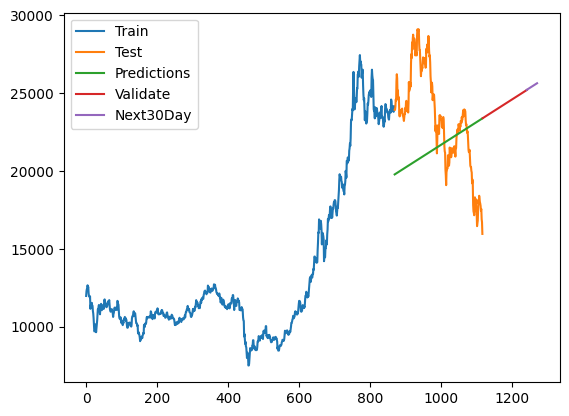

In [12]:
plt.plot(train_data.index, train_data['High'])
plt.plot(test_data.index, test_data['High'])
plt.plot(test_data.index,y_pred_ln)
plt.plot(val_data.index,y_pred_val_ln)
plt.plot(last_data,feature_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [13]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x = []
for price in feature_next_30_days:
  x.append([price])
print(type(x))
num_dims = np.ndim(x)
print(num_dims)
y_next_30_days = model.predictN(featureDict={'High': x}, N = 30)
y_next_30_days = y_next_30_days[0]
print(y_next_30_days)


<class 'list'>
2
[24972.586280375574, 24487.290267345717, 24794.36730885601, 24596.07043702127, 24780.385526719594, 24730.189473258426, 24725.812755417563, 24789.99356488442, 24819.181327809594, 24819.510754464838, 24823.96208587596, 24812.070647645494, 24883.219999176126, 24902.0208923357, 24855.59327612383, 24945.399603213344, 24958.970613213685, 24968.817166769502, 24967.468595245722, 24959.11172063397, 25028.10704667414, 25048.220641009342, 25000.993041514095, 25091.286892546443, 25104.560796844977, 25114.588411863213, 25113.129498286173, 25104.83986807063, 25173.79421418803, 25193.932782411975]


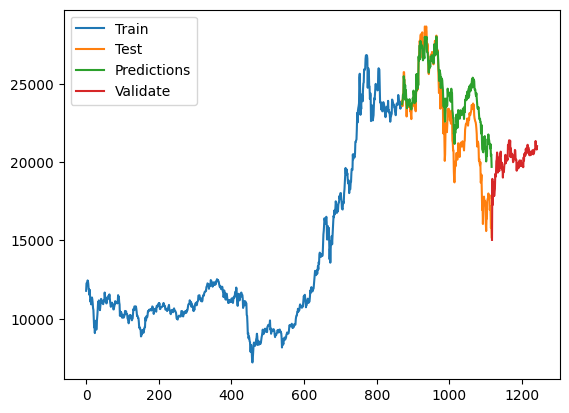

In [15]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index,y_pred)
plt.plot(val_data.index,y_pred_val)
# plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()